# Titanic: Machine Learning from Disaster

By: André Kenji Yai

## Workflow

### Dataset/Questions

    - Defining our question 
    - Import dataset
    - Enough data
    - Enough/right features to measure question

### Data Understanding

    - Exploration
    - Creation new features

### Data Preparation

    - Data Missing
    - Feature Engineering
    - Feature Selection
    
### Model

    - Picking an algorithm
    - Tunning your algorithm

### Validation/Evaluation
    -  Validate: train/test ,k-fold
    - Evaluate: accuracy, precision, F1 score, custom bias/variance


## I. Dataset/Question

## Question: 
Predict survival on the Titanic 

## Description:

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

![Image](https://ichef.bbci.co.uk/news/624/cpsprodpb/2A7A/production/_95847801_49ce589f-5fba-425f-80f0-39a6ce49bff0.gif)

### Libraries

Pandas and numpy for data analysis and representation.

Seaborn and matplot and pandas for visualization. 

Sklearn for Machine Learning 


In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold,cross_val_score
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = (15 , 8)

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Get the Dataset

The train_df will contain our training data, test_df our test data.

In [2]:
train_df = pd.read_csv('./csvs/train.csv')
test_df = pd.read_csv('./csvs/test.csv')

### Analyse data Fields

Let's start lookimg in to training and test set.

In [3]:
def print_shape_columns_info (df):
    df_shape = df.shape
    print("---------------------")
    print("Rows: ",df_shape[0]," Col: ",df_shape[1])
    print("---------------------")
    print("Columns:",df.columns.values)

In [4]:
print("Training Data Set:")
print_shape_columns_info(train_df)

Training Data Set:
---------------------
Rows:  891  Col:  12
---------------------
Columns: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
print("Test Data Set:")
print_shape_columns_info(test_df)

Test Data Set:
---------------------
Rows:  418  Col:  11
---------------------
Columns: ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


Pandas let us take a sneak peak into the dataset.

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Once we took a look into the data let's take a look in their types and if we have some missing data.

In [8]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [9]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


From the stats above we noticed that we have some missing data in the some of the fields:

**Missing Field in Training Data**
    - We have missing values in Cabin (687 values) ,Age (177 values), Embarked (2 values).
    
**Missing Field in Test**
    - We have missing values in Cabin (327 values) ,Age, (86 values) Fare (1 value).
    

We alse got that we have different types of data. We have numerical (int/floats) and also categorical (object).

## Information from the data fields:
Data Types: 

**Type** : *Field*

**Numerical - Float/Int**: *PassagerId, Pclass, Age, SibSp, Parch, Fare*

**String - Object** : *Name, Sex, Ticket,  Cabin, Embarked*

**Continuos**:  *Age,Fare* 

**Discrete**:  *SibSp, Parch*

**Ordinal**: *Pclass*

**Categorial**: *Survived, Sex, and Embarked. *

**Mixed data types(Numerical, alphanumeric data)**:*Ticket*

More information about the data in [Kaggle Titanic data](https://www.kaggle.com/c/titanic/data) .

# 2. Features

## 2.1 Initial Data Exploration

### Data Overview

##### Distribution of Numerical Features

- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with mean ast 32.2 and std 49.69
- Maximum age range 65-80.

In [10]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


##### Distribution of categorical features:
- Every passenger have a unique name
- We get that we have more male than female
- We get that 210 tickets were duplicated.
- There were more people that embarked in S.

In [11]:
print(train_df.describe(include=['O']))

                            Name   Sex    Ticket Cabin Embarked
count                        891   891       891   204      889
unique                       891     2       681   147        3
top     O'Connell, Mr. Patrick D  male  CA. 2343    G6        S
freq                           1   577         7     4      644


# 2.2 Statistical Summaries and Visualization

In this statistical summaries and visualization part, we will be performing our analysis on the training set due the presence of the survival field.

### 2.2.1 Initial Handeling Missing Data 

In order to proceed with this part it is important to fill the missing data. Initially we will fill them with a more general approach. Later we will see an other approach that can be used to fill those missing values.


In [12]:
train_df['Age'].fillna(train_df.Age.median(), inplace=True) 

In [13]:
train_df['Embarked'].fillna('S', inplace=True) 

In [14]:
train_df['Cabin'].fillna("U", inplace=True) 

Verification that there are no more missing values in our training set. 

In [15]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


### 2.2.2 Statistics of the Survivors:

First statistics that should be done is in the Survival field since it will be used a lot in our analysis. 

- Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. 
- We have data from 1309 passengers (58.85% of all passangers). 841 in our tranning data and 418 in our test data.
- From our training data we have that 342 survived and 539 died.
- Around 38% samples survived representative of the actual survival rate at 32%.

In [16]:
# Number of Survivors: 
survived_df = train_df[train_df["Survived"] == 1];
not_survived_df = survived = train_df[train_df["Survived"] != 1];

print("Traning dataset Info:")
print("Count Survived:",len(survived_df))
print("Not Survived:",len(not_survived_df))

Traning dataset Info:
Count Survived: 342
Not Survived: 549


### 2.2.3 Univariate Analysis

We will get a sense of how the survived field is related to other fields.

And we will also test some assumptions from text:
"... some groups of people were more likely to survive than others: such as women, children and the upper-class."


### Helper Functions

This functions are going to help us to plot and show some statistcs from the data.

In [17]:

# Plots functions

def plot_bar_fraction_survivors_field(df,field,title,loc_legend="upper left"):
    ''''
    Plot fraction of survival x_axis = field and y_axis = field
    '''
    Survived_by_field = pd.crosstab(df[field],df.Survived) 
    Survived_fraction = Survived_by_field.apply(lambda r: r/r.sum(),axis = 1)
    plt.bar(Survived_by_field.index,Survived_fraction[1],color="green",label="Survived")

    sns.set_context("talk")
    sns.set_style("whitegrid")
    sns.despine(left=True)
    sns.set_style("ticks")
    
    plt.ylabel("Fraction")
    plt.xlabel(field)
    plt.title(title)
    plt.legend(loc="upper right")

def plot_hist(dataFrame,field,title,bins,legends):
    
    """
    To compare a histogram
    """
    sns.set_style("ticks")
    sns.set_context("talk")
    sns.set_style("whitegrid")
    sns.distplot(dataFrame[field], bins=bins)
    plt.title(title)
    plt.ylabel('frequency')
    plt.legend(legends);
    
def plot_hist_comparasion_graph (df1,df2,field,title,bins,legends):
    
    """
    To compare two different distribution.
    """
    

    sns.distplot(df1[field], bins=bins)
    sns.distplot(df2[field], bins=bins)
    plt.title(title)
    plt.ylabel('frequency')
    plt.legend(legends);

def plot_boxplot(df,field,title,y="Survived",hue = ""):
    '''
    Plot boxplot  
    '''
    sns.set_context("talk")
    sns.set_style("whitegrid")
    sns.despine(left=True)
    if(hue != ""):
        sns.boxplot(x=field,y=y,orient="h",data=train_df,hue = hue)
    else:
        sns.boxplot(x=field,y=y,orient="h",data=train_df)
    sns.plt.title(title)

    
def plot_counter(df,field,title):
    """
    Plot how much it appear on Survival/
    """
    sns.set_context("talk")
    sns.set_style("whitegrid")
    sns.despine(left=True)
    sns.countplot(x=field,hue="Survived", data=df) 
    sns.plt.title(title)

def plot_scatter(df,field1,field2,Title):
    '''
    Plot scatter plot
    '''
    plt.figure(figsize=(15,8))
    ax = plt.subplot()
    ax.scatter(df[df['Survived']==1][field1],df[df['Survived']==1][field2],c='green',s=40)
    ax.scatter(df[df['Survived']==0][field1],df[df['Survived']==0][field2],c='red',s=40)
    sns.plt.title(Title)
    ax.set_xlabel(field1)
    ax.set_ylabel(field2)
    ax.legend(('Survived','Dead'),scatterpoints=1,loc='upper right',fontsize=15,)

    
# Group Function
def groupbyFieldsInfo(df,field):
    """
    Print the group by of dataframe by a field and plot it apperance, count it Survival apperance, and it mean.
    """
    
    by_f = {'PassengerId':['count'], 'Survived':['sum','mean']}
    fields = field + ["PassengerId","Survived"]
    print(df[fields].groupby(field).agg(by_f))
    
# Stats functions

def get_Stats_array(array):
    """
    Given a certain array it print count it unique values, it min, max and importantant percentiles.
    """
    
    unique_values = set(array)
    
    print("There are", len(unique_values) ,"unique ages")
    print("-----------------------------------")
    print("Min",array.min())
    print("25%",np.percentile(array,25))
    print("Mean:",array.mean())
    print("Median:",np.median(array))
    print("50%",np.percentile(array,50))
    print("75%",np.percentile(array,75))
    print("Max:",array.max())

### Statistical Summuries for Categorical data

### Sex 

We got some information:
- Most of passangers were male: In trainning set 577 passengers were male and 314 were female.
- Most female passangers survived. In our trainning set there were 233 (0.74% female) and 109 (0.18%)
- This indicate that female were most likely to survive.

In [18]:
#how many female are in dataset, survived, survived ratio
groupbyFieldsInfo(train_df,["Sex"])

       PassengerId Survived          
             count      sum      mean
Sex                                  
female         314      233  0.742038
male           577      109  0.188908


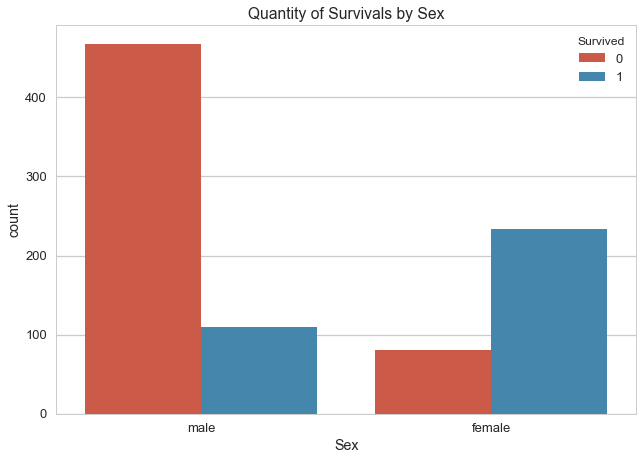

In [19]:
plot_counter(train_df,"Sex",'Quantity of Survivals by Sex')
plt.savefig('./figs/SexSurvived.png')

### Embarked

- Context
    - The Titanic trip was from Cherbourg (C) to New York, with stops in Southampton(S) and Queenstown(Q). 
    - In each Great Britain (GB) city there were passenger that joined Titanic.
    
    
- From our Training Set
    - Most passangers in train set were from Southamptown(S) with 644 passangers. Follow by Cherbourg (C) with 168 and than Queenstown with 77.
    - There were more survivors from Southamption with 217 survivors.
    - The passengers from Cherbourg had higher survive with a rate of 0.553


![Image](http://2.bp.blogspot.com/_02Mg78aSCdk/S8cpNdir0iI/AAAAAAAAAWQ/W7w20e35FeU/s1600/TitanicRoute_svg.png)

In [20]:
groupbyFieldsInfo(train_df,["Embarked"])

         PassengerId Survived          
               count      sum      mean
Embarked                               
C                168       93  0.553571
Q                 77       30  0.389610
S                646      219  0.339009


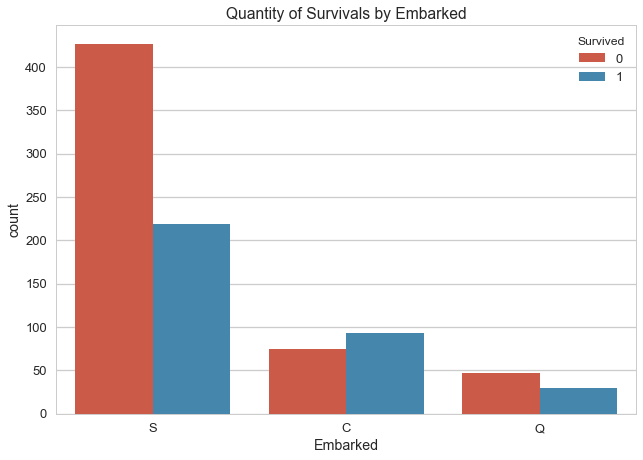

In [21]:
plot_counter(train_df,"Embarked",'Quantity of Survivals by Embarked')

## Statistical summary for numerical data

### Statistical Summary for the Ordinal Data

### Pclass

- Context
    - In the image bellow we can see the classes distribution
    - In titanic there were three classes: 1class, 2class, 3class
- Training Set:
    - There were more passengers from 3 class > 2class > 1ckass.
    - There were more survivors in 1 class (0.67) > 2 class (0.47) > 3class (0.24).  

![Image](http://www.encyclopedia-titanica.org/files/1/figure-one-side-view.gif)


In [22]:
groupbyFieldsInfo(train_df,["Pclass"])

       PassengerId Survived          
             count      sum      mean
Pclass                               
1              216      136  0.629630
2              184       87  0.472826
3              491      119  0.242363


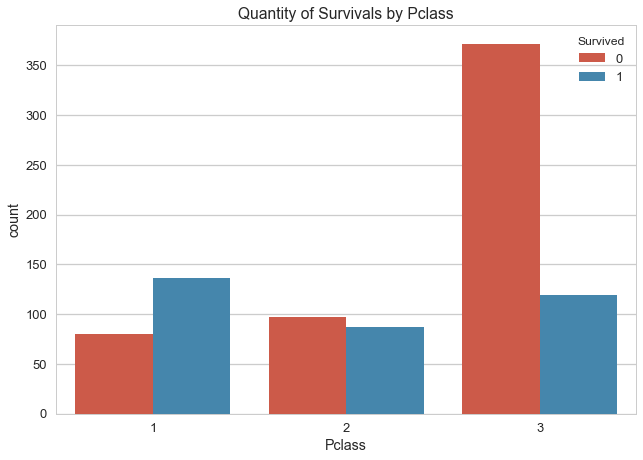

In [23]:
plot_counter(train_df,"Pclass",'Quantity of Survivals by Pclass')
plt.savefig('./figs/PclassSurvivals.png')

### Statistical Summary for the Discrite Data

### SibSp
- From our observention in the data set:
    - There were more single person than with siblings or spouse
    - There survival rate is bigger where we have 1 (53%) or 2 (46%) siblings or spouses.

In [24]:
groupbyFieldsInfo(train_df,["SibSp"])

      PassengerId Survived          
            count      sum      mean
SibSp                               
0             608      210  0.345395
1             209      112  0.535885
2              28       13  0.464286
3              16        4  0.250000
4              18        3  0.166667
5               5        0  0.000000
8               7        0  0.000000


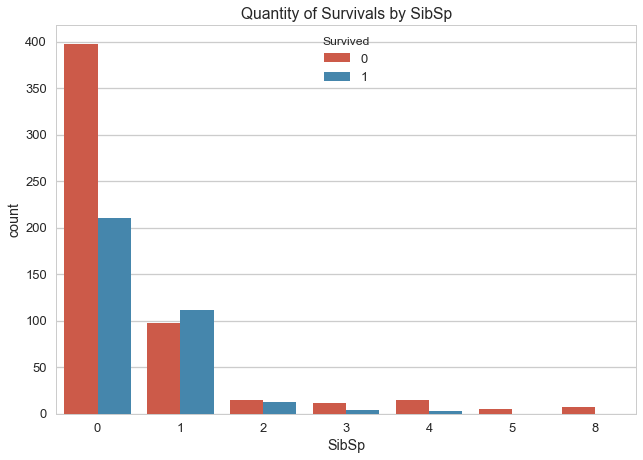

In [25]:
plot_counter(train_df,"SibSp",'Quantity of Survivals by SibSp')

### Parch
- From our observention in the data set:
    - There were more single person than with children or parents
    - There survival rate is bigger where we have 1 (55%) or 2 (50%) with children/parents.
- ** Next Step **
 - Create a join feature Parch with SibSp

In [26]:
groupbyFieldsInfo(train_df,["Parch"])

      PassengerId Survived          
            count      sum      mean
Parch                               
0             678      233  0.343658
1             118       65  0.550847
2              80       40  0.500000
3               5        3  0.600000
4               4        0  0.000000
5               5        1  0.200000
6               1        0  0.000000


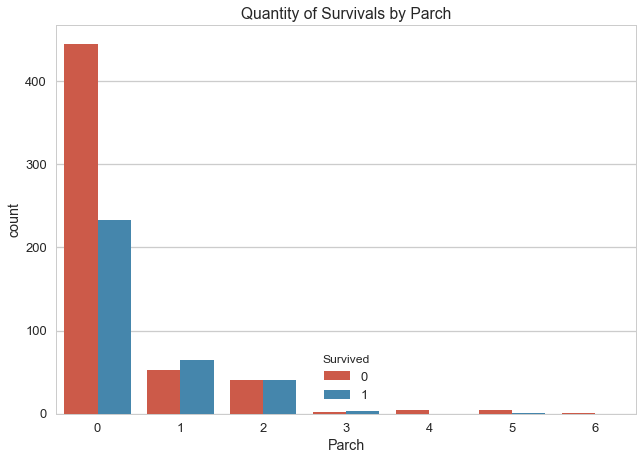

In [27]:
plot_counter(train_df,"Parch",'Quantity of Survivals by Parch')

### Statistical Summary for the Continuos data

### Age:

From our training data and removing NaN:
- The youngest passenger had 0.42 years old and the oldest 80 years old.
- We got that most of the passengers had 20-30 (young adult) years old. Follow by 30-50 (adult) and then 0-20 (children and teen) and then 50-60(old adult) at least 60-80(senior).
- Most of the children (0-12) survived the accident.

** Next Step **
- Create a new feature contaning age bins.
- Create a visualization 

In [28]:
ages_array = np.array(train_df.Age)
get_Stats_array(ages_array)

There are 88 unique ages
-----------------------------------
Min 0.42
25% 22.0
Mean: 29.3615824916
Median: 28.0
50% 28.0
75% 35.0
Max: 80.0


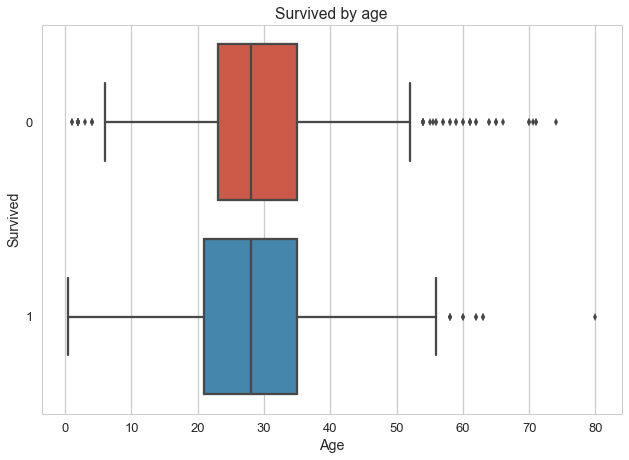

In [29]:
plot_boxplot(train_df,"Age","Survived by age")
plt.savefig('./figs/SurvivedbyAge.png')

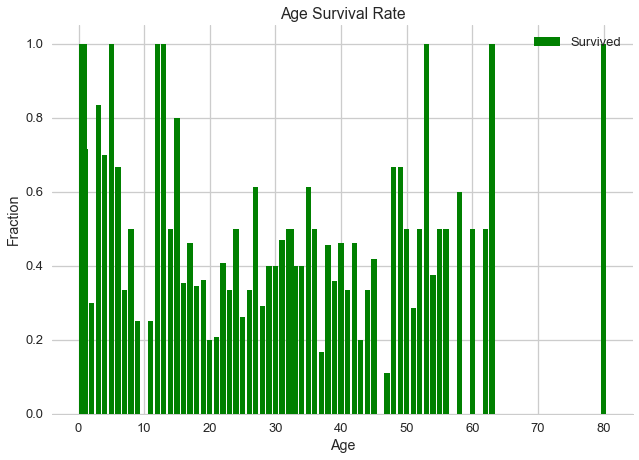

In [30]:
plot_bar_fraction_survivors_field(train_df,"Age","Age Survival Rate")
plt.savefig('./figs/AgeSurvivedRate.png')

### Fare
- The cheapest fare was free (0.000) and the most expensive was 512.00.
- Median price of the ticket was 14.45.
- Most of the people payed less than 50.00 (%) for the ticket.
- As the price payed for the ticket the chance of survivor increased. This can be correlated to Pclass.

**Next step**
- Create bins for Fare to better visualization and classification
- Create a graph comparing Fare with Pclass and also the correlation between them.

In [31]:
fare_array = np.array(train_df["Fare"])
get_Stats_array(fare_array)

There are 248 unique ages
-----------------------------------
Min 0.0
25% 7.9104
Mean: 32.2042079686
Median: 14.4542
50% 14.4542
75% 31.0
Max: 512.3292


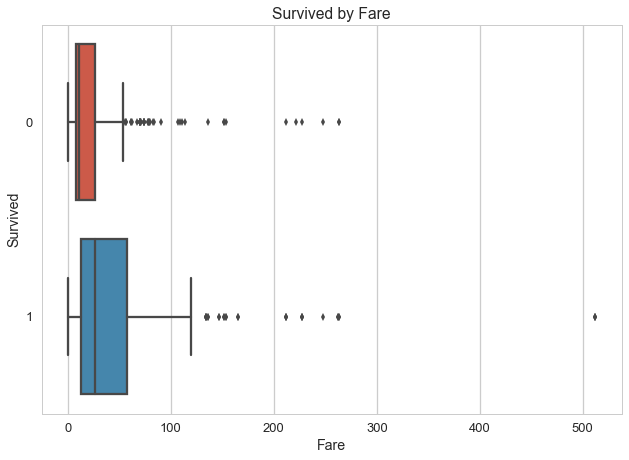

In [32]:
plot_boxplot(train_df,"Fare","Survived by Fare")
plt.savefig('./figs/SurvivedbyFare.png')

## 2.2.2 Creating Feature 

In this section we will create new features that will be used to do further analysis as well in the feature enginnering part.

###  Title Name and Last Name

In the case of Names we get that:
- For every passenger there is a unique name.
- Names are followed formed like: 
    +  Braund, **Mr.** Owen Harris
    +  Heikkinen, **Miss.** Laina
    +  Oliva y Ocana, **Dona.** Fermina

The names are usually structured like:  last name, title. firstname

For our analysis we will use the last name and title. 

The title can be as simple as Mr, Miss or more uncommon like Dona, Don, Col.

Analysing the title feature:
- The most common amoung our training set is Mr.
- The one with more survival is Miss. followed by Mrs.

In [33]:
def get_Title_Names(df):
    df["Title"] = [*map(lambda x: x.split(',')[1].split('.')[0].strip(),df["Name"])]
    TitleClass_Dic = {
            "Mr" :        "Mr",
            "Mrs" :       "Mrs",
            "Miss" :      "Miss",
            "Mme":        "Mrs",
            "Ms":         "Mrs",
            "Mlle":       "Miss",
            "Master" :    "Master",
            "Capt":       "Officer",
            "Col":        "Officer",
            "Major":      "Officer",
            "Dr":         "Officer",
            "Rev":        "Officer",
            "Jonkheer":   "Royalty",
            "Don":        "Royalty",
            "Sir" :       "Royalty",
            "the Countess":"Royalty",
            "Dona":       "Royalty",
            "Lady" :      "Royalty"

    }
    df["Title"] = df["Title"].map(TitleClass_Dic)

    return df

In [34]:
train_df = get_Title_Names(train_df)

In [35]:
groupbyFieldsInfo(train_df,["Title"])

        PassengerId Survived          
              count      sum      mean
Title                                 
Master           40       23  0.575000
Miss            184      129  0.701087
Mr              517       81  0.156673
Mrs             127      101  0.795276
Officer          18        5  0.277778
Royalty           5        3  0.600000


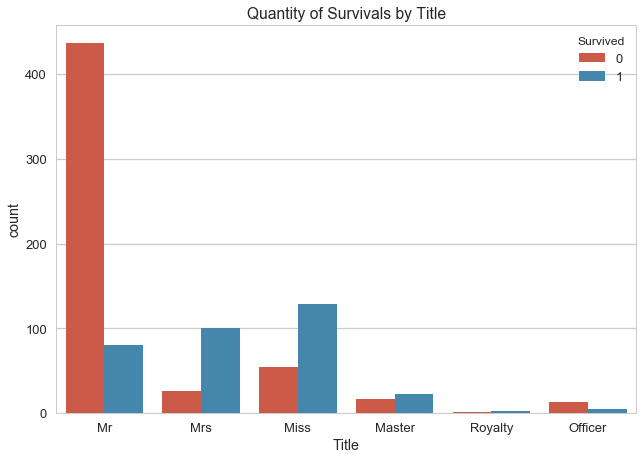

In [36]:
plot_counter(train_df,"Title",'Quantity of Survivals by Title')

### Family Size 

Observation with the new feature:
- There were more people travelling alone
- Most of passengers travelled alone did not survived.
- People with family size up to 4 had more chance to survive. 

In [37]:
def create_family_size(df):
    bins = (0,1,4,12)
    group_names = ["1_Singleton(1Person)", "2_SmallFamily(2-4People)","3_LargeFamily(5-12People)"]

    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
    df["Family_bin"] = pd.cut(df["FamilySize"],bins,labels=group_names)
    return df;

In [38]:
train_df = create_family_size(train_df)

In [39]:
groupbyFieldsInfo(train_df,["FamilySize"])

           PassengerId Survived          
                 count      sum      mean
FamilySize                               
1                  537      163  0.303538
2                  161       89  0.552795
3                  102       59  0.578431
4                   29       21  0.724138
5                   15        3  0.200000
6                   22        3  0.136364
7                   12        4  0.333333
8                    6        0  0.000000
11                   7        0  0.000000


In [40]:
groupbyFieldsInfo(train_df,["Family_bin"])

                          PassengerId Survived          
                                count      sum      mean
Family_bin                                              
1_Singleton(1Person)              537      163  0.303538
2_SmallFamily(2-4People)          292      169  0.578767
3_LargeFamily(5-12People)          62       10  0.161290


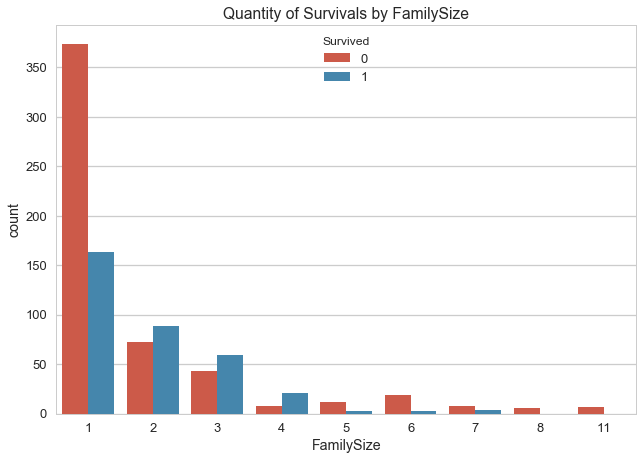

In [41]:
plot_counter(train_df,"FamilySize",'Quantity of Survivals by FamilySize')

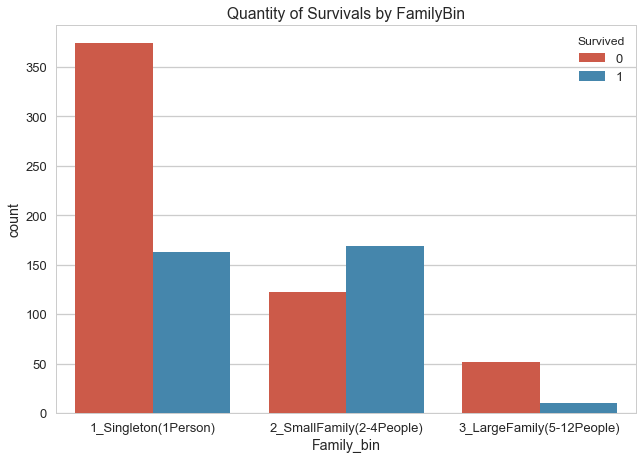

In [42]:
plot_counter(train_df,"Family_bin",'Quantity of Survivals by FamilyBin')

### Age bins

From our traning set we get that:
- Children (0-12) have the highest survival rate 0.57.
- Young Adult (20-28) have the lowest survival rate 0.36.
- We can use this feature as a parameter for predicting the survival.

In [43]:
# Fare bins:
def create_age_bins(df):
    
    bins = (0,12,20,28,40,57,82)
    group_names = ["1Children(0-12)", "2Teen(13-20)","3YngAdult(21-28)","4Adult(29-40)","5OldAdult(41-57)","6Senior(58-82)"]
    df["Age_bin"] = pd.cut(df["Age"],bins,labels=group_names)

    return df;

In [44]:
train_df = create_age_bins(train_df);
groupbyFieldsInfo(train_df,["Age_bin"])

                 PassengerId Survived          
                       count      sum      mean
Age_bin                                        
1Children(0-12)           69       40  0.579710
2Teen(13-20)             110       42  0.381818
3YngAdult(21-28)         360      118  0.327778
4Adult(29-40)            202       87  0.430693
5OldAdult(41-57)         117       45  0.384615
6Senior(58-82)            33       10  0.303030


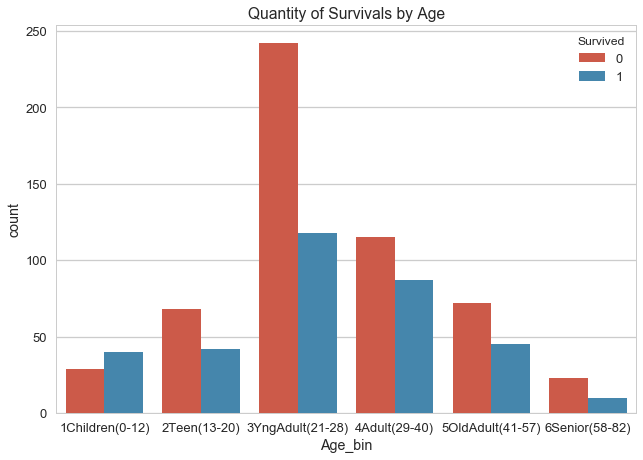

In [45]:
plot_counter(train_df,"Age_bin",'Quantity of Survivals by Age')
plt.savefig('./figs/AgeSurvived.png')

### Fare Bins

On training set once created the new variable:
- There is a clear correlation between fare price and survival:
    - When the fare price increase the chance of survival also increase.
    - Maybe can use tis in our model.

In [46]:
# Fare bins:
def create_fare_bins(df):
    
    bins = (-1, 8, 15, 31, 1000)
    group_names = ["1_Quartile", "2_Quartile","3_Quartile","4_Quartile"]
    
    df["Fare_bin"] = pd.cut(df["Fare"],bins,labels=group_names)

    return df;

In [47]:
train_df = create_fare_bins(train_df);
groupbyFieldsInfo(train_df,["Fare_bin"])

           PassengerId Survived          
                 count      sum      mean
Fare_bin                                 
1_Quartile         241       52  0.215768
2_Quartile         217       62  0.285714
3_Quartile         211       99  0.469194
4_Quartile         222      129  0.581081


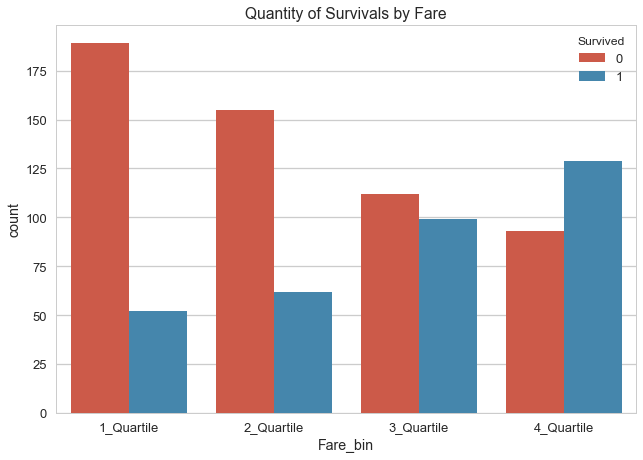

In [48]:
plot_counter(train_df,"Fare_bin",'Quantity of Survivals by Fare')
plt.savefig('./figs/FareSurvived.png')

### Cabin Letter

From those cabin information that we have we get that:
    - Cabins had  different survival rates.
    - Some cabins had differentee range of prices and classes
    - The D cabin different classes and prices or age that alomost the same survival rate stayed near than 70% 

In [49]:
train_df['Cabin'].fillna('U',inplace = True)
train_df['Cabin_Letter'] = [*map(lambda x: x[0] , train_df["Cabin"])]
groupbyFieldsInfo(train_df,["Cabin_Letter"])

             PassengerId Survived          
                   count      sum      mean
Cabin_Letter                               
A                     15        7  0.466667
B                     47       35  0.744681
C                     59       35  0.593220
D                     33       25  0.757576
E                     32       24  0.750000
F                     13        8  0.615385
G                      4        2  0.500000
T                      1        0  0.000000
U                    687      206  0.299854


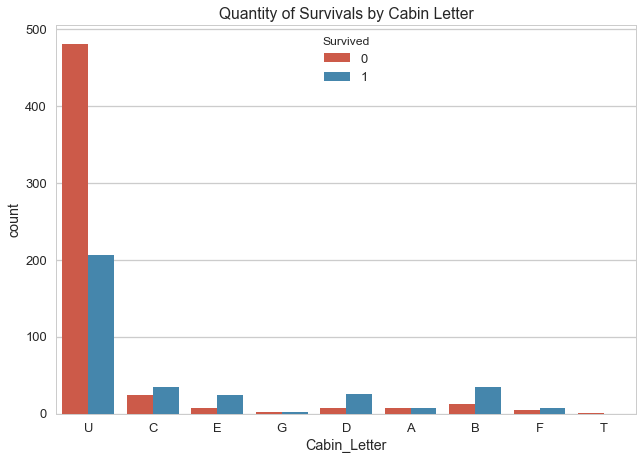

In [50]:
plot_counter(train_df,"Cabin_Letter",'Quantity of Survivals by Cabin Letter')

### Tickets

In [51]:

def prefix_ticket(ticket):
    '''
    Take the prefix of the ticket
    '''
    
    new_ticket = ticket
    
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket_list = []
    
    for text in ticket:
        text = text.strip()
        if not text.isdigit():
            ticket_list.append(text)
            
    if len(ticket_list) > 0:
        return ticket_list[0]
    else: 
        return 'DIGIT'
    

In [52]:
train_df['Ticket'] = train_df['Ticket'].map(prefix_ticket)

In [53]:
print("There are ",len(train_df['Ticket'].unique())," uniques tickets prefixes.")
groupbyFieldsInfo(train_df,["Ticket"])

There are  31  uniques tickets prefixes.
        PassengerId Survived          
              count      sum      mean
Ticket                                
A4                7        0  0.000000
A5               21        2  0.095238
AS                1        0  0.000000
C                 5        2  0.400000
CA               41       14  0.341463
CASOTON           1        0  0.000000
DIGIT           661      254  0.384266
FC                1        0  0.000000
FCC               5        4  0.800000
Fa                1        0  0.000000
LINE              4        1  0.250000
PC               60       39  0.650000
PP                3        2  0.666667
PPP               2        1  0.500000
SC                1        1  1.000000
SCA4              1        0  0.000000
SCAH              3        2  0.666667
SCOW              1        0  0.000000
SCPARIS           7        3  0.428571
SCParis           4        2  0.500000
SOC               6        1  0.166667
SOP               1    

## Summary for univariate analysis

- Sex: More women survived than men.
- Pclass: More passengers from Pclass = 1 survived.
- Family Sizes: Passengers travelling with small familly sizes (larger than 1 and up to 4) had more survival rate.
- Age and Age Bin: Children had a higher survival rate. Followed by Aldults.
- Fare and Fare Bin: More expensive tickets more likely was to survive.
- Embarked: More passengers from  Cherbourg (C) survived.

## Multivariate analysis

For this part I would like to analyse the relation between:
- Fare Bin and Class: To see that if passangers with more expensive tickets were those in first class.
- Age Bin and Sex: To see how was the distribution of female with age. Was the survival rate of female children much higher than the survival of male children?
- Why passengers from Cherbourg had better survival rate?
    - Embarked and Fare, Embarked and Pclass: Passengers from Southamption survived because they bought more expensive tickets?
    - Embarked and Sex: Were in Southamption more female and thats way there survived more.
    - Embarked and Age: Were there more children in Southamption. 

### Fare and Pclass

From the visualization bellow we can get:
- There were more Pclass = 1 in the last quartile where the prices were higher than 75%. And that contributed a lot to their survival.
- There were most of Pclass=3 in the first quartile and Pclass=2 in the second quartile where the survival rate was very low.

In [54]:
groupbyFieldsInfo(train_df,["Fare_bin"])

           PassengerId Survived          
                 count      sum      mean
Fare_bin                                 
1_Quartile         241       52  0.215768
2_Quartile         217       62  0.285714
3_Quartile         211       99  0.469194
4_Quartile         222      129  0.581081


In [55]:
groupbyFieldsInfo(train_df,["Fare_bin","Pclass"])

                  PassengerId Survived          
                        count      sum      mean
Fare_bin   Pclass                               
1_Quartile 1                6        0  0.000000
           2                6        0  0.000000
           3              229       52  0.227074
2_Quartile 2               89       35  0.393258
           3              128       27  0.210938
3_Quartile 1               51       27  0.529412
           2               67       40  0.597015
           3               93       32  0.344086
4_Quartile 1              159      109  0.685535
           2               22       12  0.545455
           3               41        8  0.195122


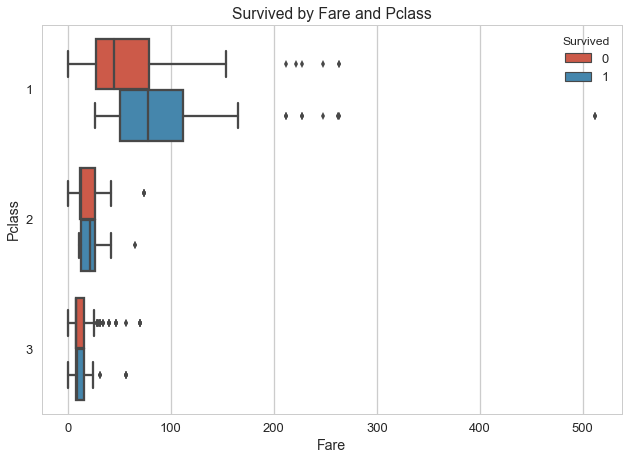

In [56]:
plot_boxplot(train_df,"Fare","Survived by Fare and Pclass",y="Pclass",hue="Survived")
plt.savefig('./figs/SurvivedFarePclass.png')

## Sex and Age
From the table below we get that:
- The chance of survival of a child is equal if it is female or male. 
- But for female the survival rate for children is less than in other ages.
- And for male the survival rate for children is higher than in other ages.
- The chance of survival of female in others ages are much higher than the chance of male.

In [57]:
groupbyFieldsInfo(train_df,["Age_bin","Sex"])

                        PassengerId Survived          
                              count      sum      mean
Age_bin          Sex                                  
1Children(0-12)  female          32       19  0.593750
                 male            37       21  0.567568
2Teen(13-20)     female          45       34  0.755556
                 male            65        8  0.123077
3YngAdult(21-28) female         116       83  0.715517
                 male           244       35  0.143443
4Adult(29-40)    female          73       60  0.821918
                 male           129       27  0.209302
5OldAdult(41-57) female          41       30  0.731707
                 male            76       15  0.197368
6Senior(58-82)   female           7        7  1.000000
                 male            26        3  0.115385


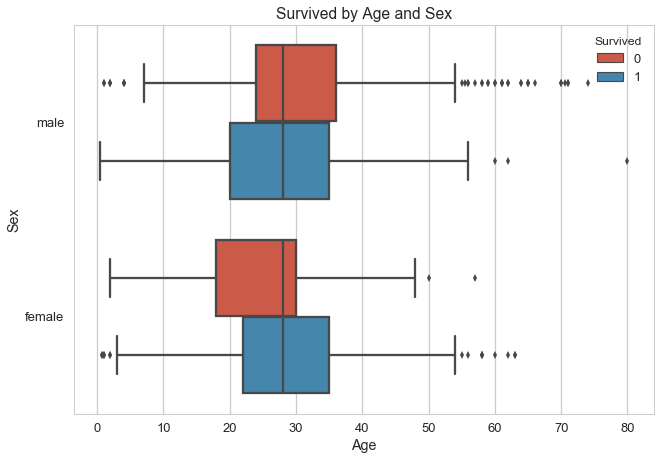

In [58]:
plot_boxplot(train_df,"Age","Survived by Age and Sex",y="Sex",hue="Survived")
plt.savefig('./figs/SurvivedAgeSex.png')

## Fare and Age
From the table below we get that:
- There weren't children in the first quartile. Almost in others quartile it has near 0.5 survival rate.
- Intersting was that in the 4 quartile is were it had less survival rate.
- A combination between Fare and Sex can explain adult had the second highest survival rate.

In [59]:
groupbyFieldsInfo(train_df,["Age_bin","Fare_bin"])

                            PassengerId Survived          
                                  count      sum      mean
Age_bin          Fare_bin                                 
1Children(0-12)  2_Quartile          10        9  0.900000
                 3_Quartile          34       20  0.588235
                 4_Quartile          25       11  0.440000
2Teen(13-20)     1_Quartile          35       10  0.285714
                 2_Quartile          39       12  0.307692
                 3_Quartile          14        8  0.571429
                 4_Quartile          22       12  0.545455
3YngAdult(21-28) 1_Quartile         144       35  0.243056
                 2_Quartile          81       16  0.197531
                 3_Quartile          69       31  0.449275
                 4_Quartile          66       36  0.545455
4Adult(29-40)    1_Quartile          43        6  0.139535
                 2_Quartile          53       17  0.320755
                 3_Quartile          55       24  0.4363

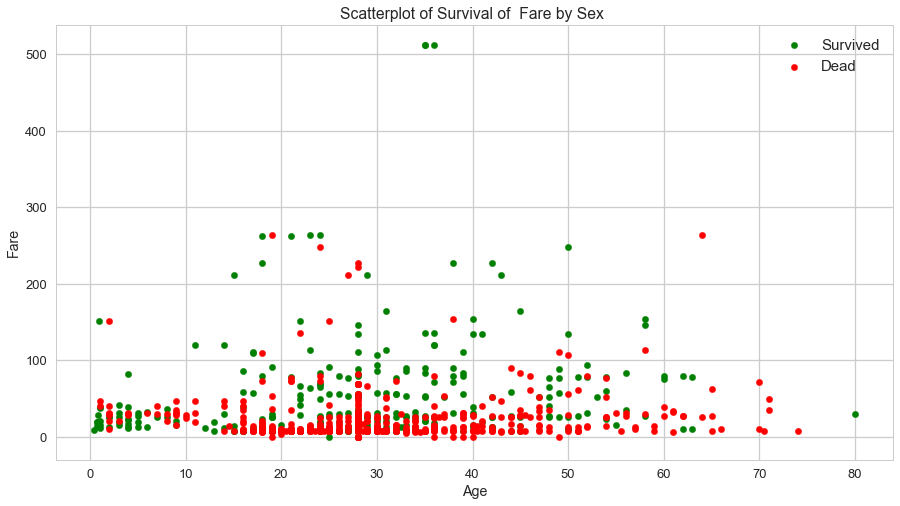

In [60]:
plot_scatter(train_df,"Age","Fare","Scatterplot of Survival of  Fare by Sex ")

### Why passengers from Cherbourg had better survival rate?

= We can see that in Cherbourg there were had higher percentage of people that bought tickets from the 4th quartile.

In [61]:
groupbyFieldsInfo(train_df,["Embarked"])

         PassengerId Survived          
               count      sum      mean
Embarked                               
C                168       93  0.553571
Q                 77       30  0.389610
S                646      219  0.339009


In [62]:
groupbyFieldsInfo(train_df,["Embarked","Fare_bin"])

                    PassengerId Survived          
                          count      sum      mean
Embarked Fare_bin                                 
C        1_Quartile          34        8  0.235294
         2_Quartile          21        9  0.428571
         3_Quartile          39       21  0.538462
         4_Quartile          74       55  0.743243
Q        1_Quartile          51       20  0.392157
         2_Quartile           6        3  0.500000
         3_Quartile          18        6  0.333333
         4_Quartile           2        1  0.500000
S        1_Quartile         156       24  0.153846
         2_Quartile         190       50  0.263158
         3_Quartile         154       72  0.467532
         4_Quartile         146       73  0.500000


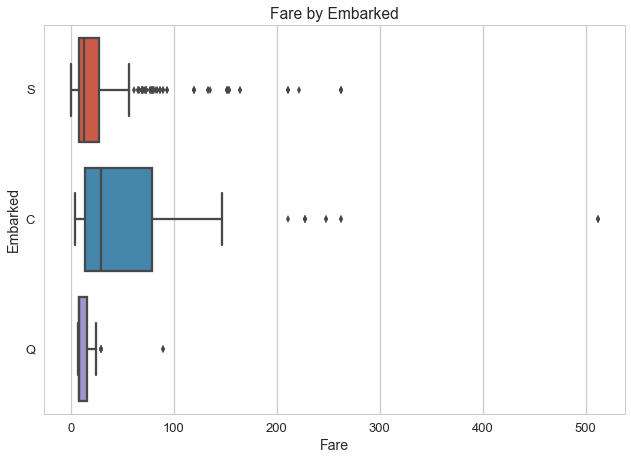

In [63]:
plot_boxplot(train_df,"Fare","Fare by Embarked",y="Embarked")

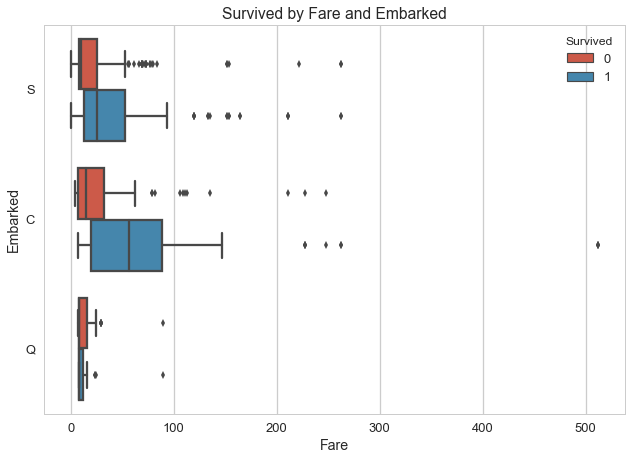

In [64]:
plot_boxplot(train_df,"Fare","Survived by Fare and Embarked",y="Embarked",hue="Survived")

### Age and Title

- We can see that the title of Master is assingned generally to males less than 10.
- Miss is also associeated with younger ages than women.
- And officer was highly associated with men.

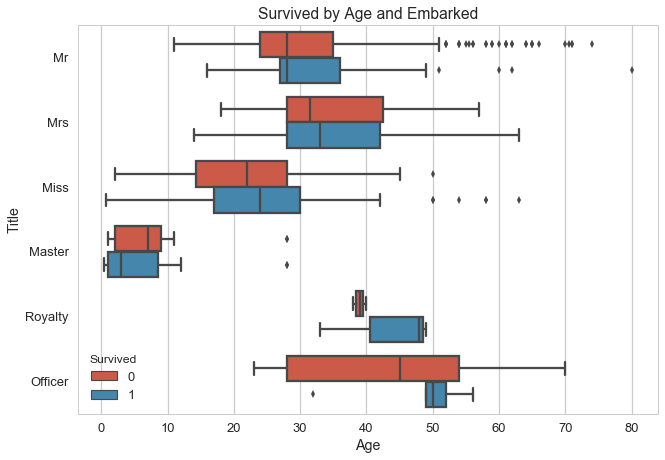

In [65]:
plot_boxplot(train_df,"Age","Survived by Age and Embarked",y="Title",hue="Survived")

# Summary

From the analysis above was possible to obtain:
- There were more people from Pclass = 1 that bought high price tickets (4 quartile)
- Cherbourg had more percentage of people that bought high price tickets (4 quartile)
- Most important features are:
        - Sex
        - Age
        - Fare price
        
- Others that may contribute:
    - Pclass 
    - Embarked
    - Family Size

## 3. Data Preparation

In this step we will:

- work with the aggregate dataset (train and test)
- We will fill the missing values 
- Create new featues for in our dataset
- Prepare our dataset to modelling.

## 3.1 Combine the training set and the test set

The traning set comes with one more feature that is the label so to combine it with test set we will need to remove and later aggregate with test set. 

In [66]:
def create_combined_df():
    
    train_df = pd.read_csv('./csvs/train.csv')
    test_df = pd.read_csv('./csvs/test.csv')
    
    labels = train_df.Survived
    train_df.drop('Survived',1,inplace=True)
    
    combined_df = train_df.append(test_df)
    combined_df.reset_index(inplace=True)
    combined_df.drop('index', inplace=True, axis=1)
    
    return combined_df;

In [67]:
train_df = pd.read_csv('./csvs/train.csv')
test_df = pd.read_csv('./csvs/test.csv')
combined_df = create_combined_df();

combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3.2 Missing Data and Feature Engineering

In this part, we will fill the missing values and  create new featues for in our dataset.

Here we are also going to use functions created in part 2.2 Creating Feature.

In [68]:
def print_missing_data(df):
    "It prints the mising data"
    print("Missing values by field:\n");
    print(df.isnull().sum())

In [69]:
# dummy encode: farebin, agebin, family_bin, sex
def encoding_feature(df,field):

    df_dummies = pd.get_dummies(df[field],prefix=field)
    df = pd.concat([df,df_dummies],axis = 1)
    df.drop(field, axis=1,inplace = True)
    
    return df
def factorization_feature(df,field):
    
    df[field] = pd.factorize(df[field])[0]

    return df

**Missing Data**


There are missing data:

+ Fare (1 value) 
+ Embarked (2 values) 
+ Age (263 values)
+ Cabin (1014 values)

There are several ways to deal with missing values:

1. Dropping the feature
2. Assign to a value that indicates a missing values - I used for missing values in Cabin
3. Assign the avarage value - I used for missing values in Embark and Fare
4. Using a Predictive Technique - I used it for missing values in Missing Age


In [70]:
print("Missing Value in Combined Data Frame:")
print_missing_data(combined_df)

Missing Value in Combined Data Frame:
Missing values by field:

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


### Sex

We will map sex into 1 for female and 0 for male and create a new feature sex_female

In [71]:
combined_df['Sex_female'] = combined_df['Sex'].map({'female':1,'male':0})
combined_df.drop("Sex", axis=1,inplace = True)

### Cabin

We saw that for Cabin we have that almost 80% of its data is missing.
For that I will replace NaN by U (Unknown)

In [72]:
combined_df['Cabin'].fillna('U',inplace = True)
combined_df['Cabin_Letter'] = [*map(lambda x: x[0] , combined_df["Cabin"])]

In [73]:
combined_df = encoding_feature(combined_df,'Cabin_Letter')
combined_df.drop("Cabin",axis=1,inplace=True)

### Title

First we will take the title name and then dummy encode it in our dataset.

In [74]:
combined_df = get_Title_Names(combined_df)

In [75]:
combined_df = encoding_feature(combined_df,'Title')
combined_df.drop("Name",axis=1,inplace=True)

### Fare

First we will get the rows with missing Fare.

In [76]:
# trying to fill the missing data
missing_Fare = combined_df[combined_df["Fare"].isnull()]
missing_Fare

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Cabin_Letter_A,...,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_T,Cabin_Letter_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
1043,1044,3,60.5,0,0,3701,NaN,S,0,0,...,0,0,0,1,0,0,1,0,0,0


Now that we got information about the row that doesn't have the Fare. We will try to see if the ticket is duplicated. Because as showed above, when we have a duplicated ticket the fare price remained the same. 

In [77]:
combined_df[(combined_df["Ticket"] == "3701")]

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Cabin_Letter_A,...,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_T,Cabin_Letter_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
1043,1044,3,60.5,0,0,3701,NaN,S,0,0,...,0,0,0,1,0,0,1,0,0,0


But unfortunally the Ticket showed us that the ticket didn't appered more than once in our dataset. So we will try to get the mean of tickets that ws used also for Senior, males, that also embarked in Southamtion. 

In [78]:
df_predict_fare = combined_df[(combined_df["Age"] > 60.0) & (combined_df["Sex_female"] == 0) & (combined_df['Embarked'] == 'S')&(combined_df['Pclass'] == 3)].sort_values("Ticket")
Fare_mean_predict = df_predict_fare["Fare"].mean()
Fare_mean_predict

7.00625

In [79]:
 combined_df.loc[combined_df["Fare"].isnull(),"Fare"] =  Fare_mean_predict

We got the mean and updated to the missing fare. Now let's update our Fare bin!

In [80]:
combined_df = create_fare_bins(combined_df)

Enconding Feature 

In [81]:
combined_df = encoding_feature(combined_df,'Fare_bin')

### Family (SibSp and Parch)

In [82]:
combined_df = create_family_size(combined_df)

In [83]:
combined_df = encoding_feature(combined_df,'Family_bin')

### Embarked

First we will get the rows with missing Embarked.

In [84]:
# trying to fill the missing data
combined_df[combined_df["Embarked"].isnull()]

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Cabin_Letter_A,...,Title_Officer,Title_Royalty,Fare_bin_1_Quartile,Fare_bin_2_Quartile,Fare_bin_3_Quartile,Fare_bin_4_Quartile,FamilySize,Family_bin_1_Singleton(1Person),Family_bin_2_SmallFamily(2-4People),Family_bin_3_LargeFamily(5-12People)
61,62,1,38.0,0,0,113572,80.0,NaN,1,0,...,0,0,0,0,0,1,1,1,0,0
829,830,1,62.0,0,0,113572,80.0,NaN,1,0,...,0,0,0,0,0,1,1,1,0,0


We will use as base to our prediction for those missing values in Embark those with female sex,in  4_Quartile fare_bin, in first class and travelling alone. 

In [85]:
df_predict_embark = combined_df[(combined_df["Embarked"].notnull()) & (combined_df['Fare_bin_4_Quartile'] == 1)  & (combined_df['Pclass'] == 1) & (combined_df['Sex_female'] == 1) &(combined_df['FamilySize'] == 1 )]
df_predict_embark.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Cabin_Letter_A,...,Title_Officer,Title_Royalty,Fare_bin_1_Quartile,Fare_bin_2_Quartile,Fare_bin_3_Quartile,Fare_bin_4_Quartile,FamilySize,Family_bin_1_Singleton(1Person),Family_bin_2_SmallFamily(2-4People),Family_bin_3_LargeFamily(5-12People)
195,196,1,58.0,0,0,PC 17569,146.5208,C,1,0,...,0,0,0,0,0,1,1,1,0,0
218,219,1,32.0,0,0,11813,76.2917,C,1,0,...,0,0,0,0,0,1,1,1,0,0
256,257,1,NaN,0,0,PC 17585,79.2000,C,1,0,...,0,0,0,0,0,1,1,1,0,0
257,258,1,30.0,0,0,110152,86.5000,S,1,0,...,0,0,0,0,0,1,1,1,0,0
258,259,1,35.0,0,0,PC 17755,512.3292,C,1,0,...,0,0,0,0,0,1,1,1,0,0


Once we got the most similar rows to those that we want to predictwhere they embarked. I will analyse those that are similar age to Miss Icard.

In [86]:
df_predict_embark[(df_predict_embark["Age"] > 35)& (df_predict_embark["Age"] < 40) ].groupby(["Embarked"]).count()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Cabin_Letter_A,Cabin_Letter_B,...,Title_Officer,Title_Royalty,Fare_bin_1_Quartile,Fare_bin_2_Quartile,Fare_bin_3_Quartile,Fare_bin_4_Quartile,FamilySize,Family_bin_1_Singleton(1Person),Family_bin_2_SmallFamily(2-4People),Family_bin_3_LargeFamily(5-12People)
Embarked,,,,,,,,,,,,,,,,,,,,,
C,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
S,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


For Miss Icard is more likely to be from Cherbourg.

In [87]:
combined_df.loc[(combined_df["Embarked"].isnull()) & (combined_df["Age"] == 38), "Embarked"] = 'S'

Now I will analyse those with similar age to Mrs Stone.

In [88]:
df_predict_embark[df_predict_embark["Age"] > 55].groupby(["Embarked"]).count()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Cabin_Letter_A,Cabin_Letter_B,...,Title_Officer,Title_Royalty,Fare_bin_1_Quartile,Fare_bin_2_Quartile,Fare_bin_3_Quartile,Fare_bin_4_Quartile,FamilySize,Family_bin_1_Singleton(1Person),Family_bin_2_SmallFamily(2-4People),Family_bin_3_LargeFamily(5-12People)
Embarked,,,,,,,,,,,,,,,,,,,,,
C,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


For those with age similar to Mrs Stone, they embarked in Cherbourg (C). So I assign the C to where Mrs Stone embarked.

In [89]:
combined_df.loc[(combined_df["Embarked"].isnull()) & (combined_df["Age"] == 60), "Embarked"] = 'C'

Dummy encoding embarked

In [90]:
combined_df = encoding_feature(combined_df,'Embarked')

###  Age

For the missing age I will try to fiil it using a random florest regressor.
The list of features that we will need to perform our prediction on the missing ages. I will use the features: Fare, Parch,SibSp, Pclass, Titles, Embarked.

In [91]:
feature_list = ["Age","Fare","Sex_female",
                "Parch","SibSp","Pclass","Title_Mr","Title_Mrs","Title_Miss","Title_Master","Embarked_S","Embarked_Q","Embarked_C"]


We will need to separate our rows that are missing Age.

In [92]:
ageNa_df = combined_df[combined_df["Age"].isnull()][feature_list]
ageDropNa_df = combined_df[combined_df["Age"].notnull()][feature_list]

Prepare our data dividing the dataset into labels and features.

In [93]:
y = ageDropNa_df["Age"]
X = ageDropNa_df[feature_list[1:]]

y_predict_test = ageNa_df["Age"]
X_predict_test = ageNa_df[feature_list[1:]]


Prepare our data dividing the dataset into test and train.

In [94]:
# from sklearn.linear_model import LinearRegression
# regr = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
regr =  RandomForestRegressor(n_estimators=2000, n_jobs=-1)
regr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [95]:
regression_predicted = regr.predict(X_predict_test);

Predicted Values in regression_predicted

In [96]:
ageNa_df["Age"] = regression_predicted
combined_df.loc[combined_df["Age"].isnull(),"Age"] = regression_predicted


Updating Values into dataset!!

In [97]:
regression_predicted.min(),regression_predicted.max()

(3.7347061111111097, 53.210805952380937)

We got a positive range going from 3.75 to 53.61.

In [98]:
combined_df.loc[combined_df["Fare"] == 8.4583]

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Cabin_Letter_A,Cabin_Letter_B,...,Fare_bin_2_Quartile,Fare_bin_3_Quartile,Fare_bin_4_Quartile,FamilySize,Family_bin_1_Singleton(1Person),Family_bin_2_SmallFamily(2-4People),Family_bin_3_LargeFamily(5-12People),Embarked_C,Embarked_Q,Embarked_S
5,6,3,28.035044,0,0,330877,8.4583,0,0,0,...,1,0,0,1,1,0,0,0,1,0


Now we will need to update the age_bin in our combined_df

In [99]:
combined_df = create_age_bins(combined_df)

Encoding  feature

In [100]:
combined_df = encoding_feature(combined_df,'Age_bin')

Let's check for missing data. 

In [101]:
print_missing_data(combined_df)

Missing values by field:

PassengerId                             0
Pclass                                  0
Age                                     0
SibSp                                   0
Parch                                   0
Ticket                                  0
Fare                                    0
Sex_female                              0
Cabin_Letter_A                          0
Cabin_Letter_B                          0
Cabin_Letter_C                          0
Cabin_Letter_D                          0
Cabin_Letter_E                          0
Cabin_Letter_F                          0
Cabin_Letter_G                          0
Cabin_Letter_T                          0
Cabin_Letter_U                          0
Title_Master                            0
Title_Miss                              0
Title_Mr                                0
Title_Mrs                               0
Title_Officer                           0
Title_Royalty                           0
Fare_bin

We filled all our missing points!!

### Pclass

In [102]:
combined_df = encoding_feature(combined_df,'Pclass')

### PassengerId

In [103]:
combined_df.drop("PassengerId",axis=1,inplace=True)

### Ticket

In [104]:
combined_df['Ticket'] = combined_df['Ticket'].map(prefix_ticket)

In [105]:
combined_df = encoding_feature(combined_df,'Ticket')

### Encoding values bins

## 3.2 Features Selection

We will select the field that are more important to our tests

In [106]:
print(combined_df.shape)

(1309, 77)


In [107]:
combined_df.columns.values

array(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Cabin_Letter_A',
       'Cabin_Letter_B', 'Cabin_Letter_C', 'Cabin_Letter_D',
       'Cabin_Letter_E', 'Cabin_Letter_F', 'Cabin_Letter_G',
       'Cabin_Letter_T', 'Cabin_Letter_U', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Fare_bin_1_Quartile', 'Fare_bin_2_Quartile', 'Fare_bin_3_Quartile',
       'Fare_bin_4_Quartile', 'FamilySize',
       'Family_bin_1_Singleton(1Person)',
       'Family_bin_2_SmallFamily(2-4People)',
       'Family_bin_3_LargeFamily(5-12People)', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Age_bin_1Children(0-12)', 'Age_bin_2Teen(13-20)',
       'Age_bin_3YngAdult(21-28)', 'Age_bin_4Adult(29-40)',
       'Age_bin_5OldAdult(41-57)', 'Age_bin_6Senior(58-82)', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Ticket_A', 'Ticket_A4', 'Ticket_A5',
       'Ticket_AQ3', 'Ticket_AQ4', 'Ticket_AS', 'Ticket_C', 'Ticket_CA',
       'Ticket_CASOTON', 'Ticket_DIGI

In [108]:
def printall(df, max_rows=10):
    from IPython.display import display,HTML
    display(HTML(df.to_html(max_rows=max_rows)))

printall(combined_df)

,Age,SibSp,Parch,Fare,Sex_female,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_C,Cabin_Letter_D,Cabin_Letter_E,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_T,Cabin_Letter_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Fare_bin_1_Quartile,Fare_bin_2_Quartile,Fare_bin_3_Quartile,Fare_bin_4_Quartile,FamilySize,Family_bin_1_Singleton(1Person),Family_bin_2_SmallFamily(2-4People),Family_bin_3_LargeFamily(5-12People),Embarked_C,Embarked_Q,Embarked_S,Age_bin_1Children(0-12),Age_bin_2Teen(13-20),Age_bin_3YngAdult(21-28),Age_bin_4Adult(29-40),Age_bin_5OldAdult(41-57),Age_bin_6Senior(58-82),Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_DIGIT,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP
0,22.000000,1,0,7.2500,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,38.000000,1,0,71.2833,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,35.000000,1,0,53.1000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35.000000,0,0,8.0500,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,30.100030,0,0,8.0500,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1305,39.000000,0,0,108.9000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1306,38.500000,0,0,7.2500,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1307,30.100030,0,0,8.0500,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
def get_train_test_labels(df):
    '''
    This function returns the trainning, test and labels set
    '''
    
    train_set = pd.read_csv('./csvs/train.csv')
    
    labels = train_set.Survived
    train_size = len(train_set)
    train_df = combined_df.head(train_size)
    test_df = combined_df.iloc[train_size:]

    return train_df,test_df,labels

def create_Random_Forest(X_train,y_train):
    '''
    Create Random Forest
    '''
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 1000,'min_samples_split': 50, 'max_features': 'log2', 'max_depth': 8}
    clf = RandomForestClassifier(**parameters)
    clf.fit(X_train, y_train)
    
    return clf

        
def plot_bar_importances(clf,X_train):
    '''
    plot BAR Importance
    '''
    
    scores = clf.feature_importances_ 
    features_list = X_train.columns

    feature_importances = pd.DataFrame()
    feature_importances["feature"] = features_list
    feature_importances["importance"] = scores
    feature_importances.sort_values(by=["importance"],inplace=True)
    feature_importances.set_index('feature',inplace=True)
    feature_importances.plot(kind="barh", figsize=(20,20))    
    


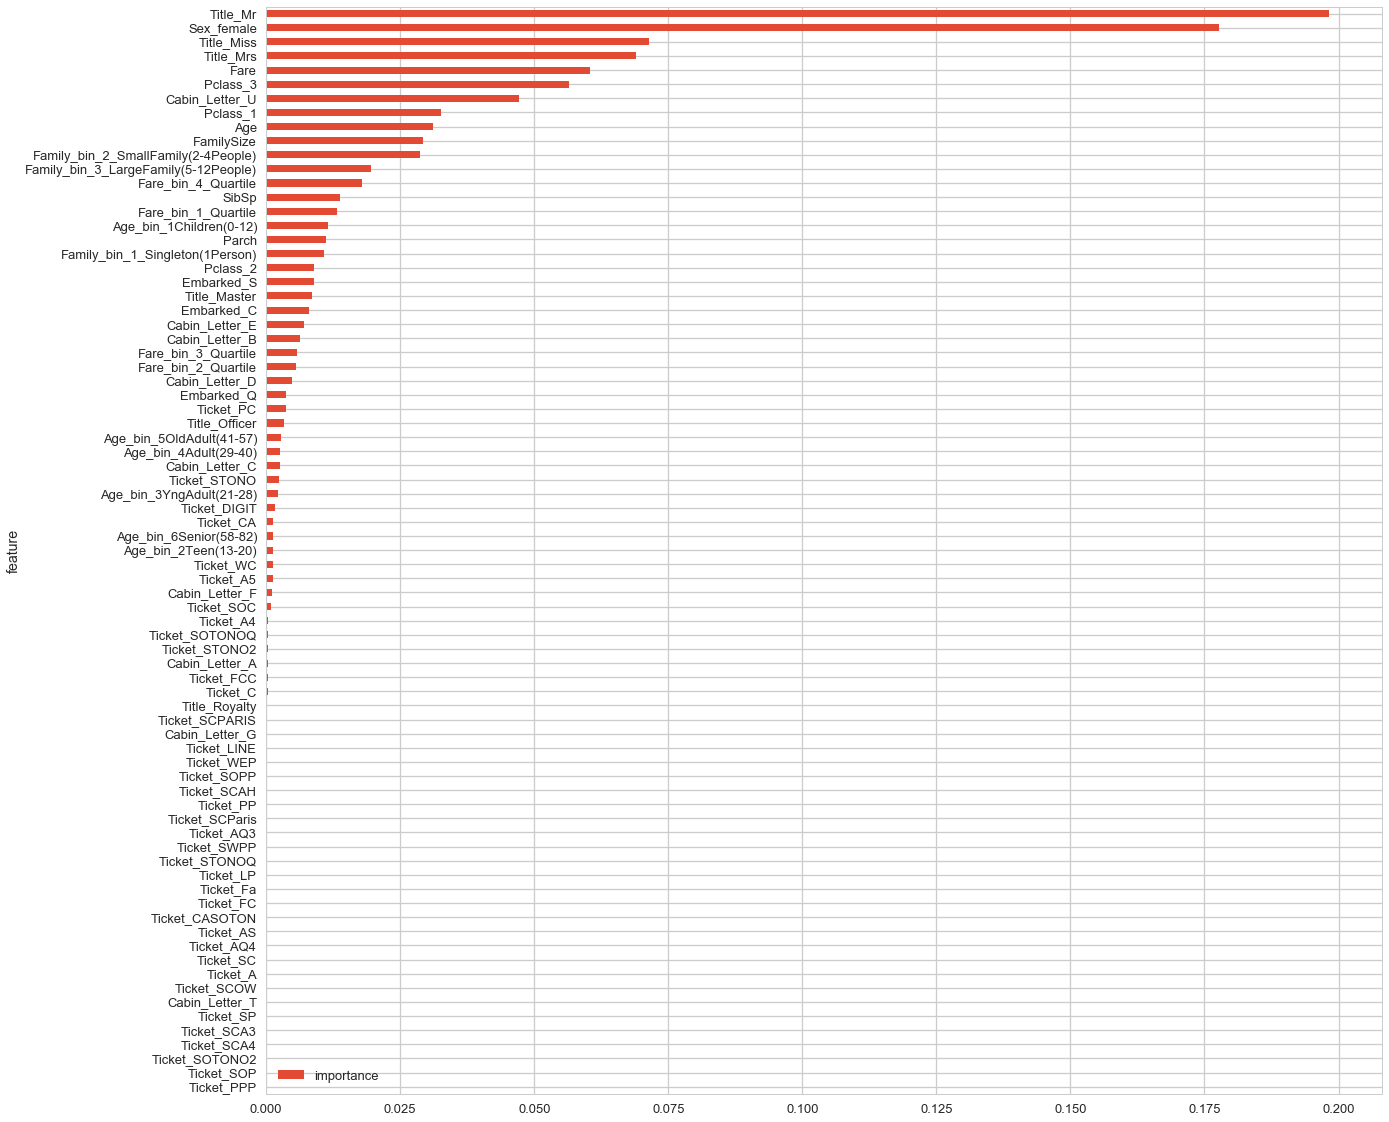

In [110]:
train_df,test_df,labels = get_train_test_labels(combined_df)
clf = create_Random_Forest(train_df,labels)
plot_bar_importances(clf,train_df)
plt.savefig('./figs/FeatureSelection.png')

In [111]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train_df)
train_reduced.shape

(891, 15)

In [112]:
test_reduced = model.transform(test_df)
test_reduced.shape

(418, 15)

# 4. Model

### 4.1 Model Female Sex

Data Preparation

In [113]:
women_df = train_df[["Sex_female"]]
women_labels = labels

In [114]:
X_train, X_test, y_train, y_test = train_test_split(women_df, women_labels, test_size=0.30, random_state=42)

Auxiliar Function

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def create_model_LogisticRegression(X_train,y_train):
    '''
    This function will create a Logistic Regression Model
    '''
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    
    return clf;

def compute_accuracy(clf,X_test,y_test):
    '''
    This function will compute the accuracy
    '''
    predict = clf.predict(X_test)
    print("Predict:",accuracy_score(y_test,predict)) 

def compute_female_labels(value,X_train,y_train):
    '''
    This function will create the labels for women
    '''
    w_labels = []
    y_train_index = y_train.index.tolist()
    for index,element in enumerate(X_train["Sex_female"]):
        if element == 1:
            w_labels.append(value)
        else:
            w_labels.append(y_train.loc[y_train_index[index]])
    return w_labels

def compute_survival_rate(survived,X_train,y_train,X_test,y_test):
    '''
    This function will compute the survival rate given a survived or not value
    '''
    w_labels = compute_female_labels(survived,X_train,y_train);    
    clf = create_model_LogisticRegression(X_train,w_labels)
    compute_accuracy(clf,X_test,y_test)


#### Model predicted for using current training set

In [116]:
clf = create_model_LogisticRegression(X_train,y_train)
compute_accuracy(clf,X_test,y_test)

Predict: 0.791044776119


#### Model predicted for every women_died 

In [117]:
survived = 0
compute_survival_rate(survived,X_train,y_train,X_test,y_test)

Predict: 0.585820895522


#### Model predicted for every women_survived 

In [118]:
survived = 1
compute_survival_rate(survived,X_train,y_train,X_test,y_test)

Predict: 0.791044776119


**Conclussion**

We got that the model predicted that every women survived (79.10%) is better than one that every died 58.58%).
We got a result that is equal than to the actual value.

### Model for prediction of survival

For predicting the survival I tested with decision tree and AdaBoost and Random Forest. Those two are solutions that
use decision trees but ensemble it. Random Forest creates random decisision Trees and take the mean result to predict
while Adaboost creates a sequence of weak learners on repeatedly modified versions of the data.Prediction from all are 
combined and weigthed to produce the final prediction.
Then at the final I decided to use random forest.

In [119]:
def compute_score(clf, X, y, scoring='accuracy'):
    '''
    Calculates the scoring of the model.
    '''
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

### Decision Tree

In [120]:
clf = tree.DecisionTreeClassifier(random_state=0)

In [121]:
clf = clf.fit(train_reduced, labels)

In [122]:
accuracy = compute_score(clf, train_reduced, labels, scoring='accuracy')
print("The value for Decision Tree is:",accuracy)

The value for Decision Tree is: 0.785578662502


Exporting the decission tree model. 

In [123]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

### Ensemble Models

### AdaBoost

In [124]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=1000)

In [125]:
accuracy = compute_score(clf, train_reduced, labels, scoring='accuracy')
print("The value for Adaboost is:",accuracy)

The value for Adaboost is: 0.811484484466


### Random Forest

In [126]:
parameters = {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 
              'min_samples_split': 10, 'n_estimators': 1000}

clf = RandomForestClassifier(**parameters)
clf.fit(train_reduced, labels)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [127]:
accuracy = compute_score(clf, train_reduced, labels, scoring='accuracy')
print("The value for Adaboost is:",accuracy)

The value for Adaboost is: 0.831691010704


# 5. Tuning Parameters and Validation

In this step we will tune Random Forest and use Cross Validation and GridSearchCV.

Functions for cross validation and GridSearch

In [128]:
def init_cross_validation(train_reduced, labels):
    
    cross_validation = StratifiedKFold(n_splits=5)
    cross_validation.get_n_splits(train_reduced, labels)
    
    return cross_validation;

def generate_grid_search_model(model,parameters,train_reduced,labels):
    
    cross_validation = init_cross_validation(train_reduced, labels);
    
    grid_search = GridSearchCV(model,
                               scoring='accuracy',
                               param_grid = parameters,
                               cv = cross_validation)

    grid_search.fit(train_reduced, labels)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
    return model


In [129]:
def create_random_forest(train_reduced,labels,run_grid_search=False):
    
    if run_grid_search:
        
        parameter_grid = {
            'max_depth' : [4, 6, 8],
            'n_estimators': [50,1000],
            'max_features': ['sqrt', 'auto', 'log2'],
            'min_samples_split': [3, 10],
            'min_samples_leaf': [1, 3, 10],
            'bootstrap': [True, False],
        }
        clf = RandomForestClassifier()
        clf = generate_grid_search_model(clf,parameter_grid,train_reduced,labels)
    else: 
        parameters = {'bootstrap': False, 'max_depth': 6, 'max_features': 'sqrt',
                      'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}

        clf = RandomForestClassifier(**parameters)
        clf.fit(train_reduced, labels)

    return clf

In [130]:
model = create_random_forest(train_reduced,labels,run_grid_search=False)

# 6. Evaluation

In [131]:
compute_score(model, train_reduced, labels, scoring='accuracy')

0.82717772654459354

## 7. Output

In [132]:
output = model.predict(test_reduced).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('./csvs/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('./csvs/output.csv',index=False)

# References

- https://www.britannica.com/topic/Titanic 

- http://www.titanicfacts.net/

- https://www.kaggle.com/c/titanic  

- https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial

- http://www.ultravioletanalytics.com/2014/11/03/kaggle-titanic-competition-part-ii-missing-values/  